# NEXRAD SITES WITH LAT/LON
## Author: Hamid Ali Syed | [@hamidrixvi](https://twitter.com/hamidrixvi) | syed44@purdue.edu

### Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as feat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches
import plotly.graph_objects as go
import glob
import os

The add_Map() function is to add coastlines, land, ocean, and state boundaries to the axes.

In [2]:
def add_Map(ax, b = 0, t=0, l = 0, r = 0):
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='black', alpha=0.3, 
                         linestyle='-', draw_labels=True)
    gl.xlabels_top = t
    gl.xlabels_bottom = b
    gl.ylabels_left = l
    gl.ylabels_right=r
    gl.xlines = True
    gl.ylines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.add_feature(feat.BORDERS, lw = 0.5)
    ax.add_feature(feat.LAND, lw = 0.3, fc = [0.9,0.9,0.9])
    ax.add_feature(feat.COASTLINE, lw = 0.5)
    ax.add_feature(feat.OCEAN, alpha = 0.5)
    ax.add_feature(feat.STATES.with_scale("10m"), alpha = 0.5, lw = 0.5)

### Read NEXRAD data

In [3]:
df = pd.read_csv("nexrad_site_list.csv")

In [4]:
df

,ID,NAME,LAT,LON
0,KVNX,VANCE AFB,36.740617,-98.127717
1,PACG,SITKA,56.852778,-135.529167
2,PAEC,NOME,64.511389,-165.295000
3,TJUA,SAN JUAN,18.115667,-66.078167
4,TJRV,JOSE APONTE DE LA TORR,18.256000,-65.637000
...,...,...,...,...
207,KOHX,NASHVILLE,36.247222,-86.562500
208,KYUX,YUMA,32.495281,-114.656711
209,RKSG,CAMP HUMPHREYS,37.207569,127.285561
210,TFLL,FT LAUDERDALE,26.143056,-80.343889


### Plotting the data

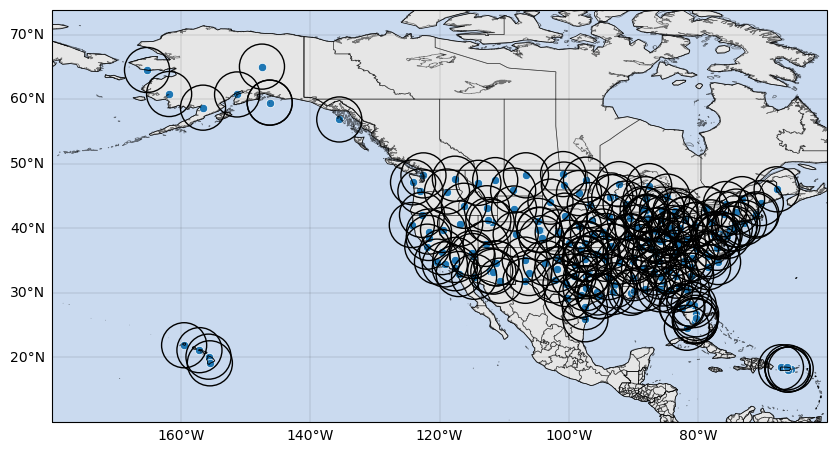

In [5]:
fig = plt.figure(figsize = [10,6])
ax = plt.axes(projection = ccrs.PlateCarree((-91+-85)/2))
# ax.set_global()
ax.set_extent([-180, -60, 10, 60])
sns.scatterplot(data=df, x = "LON", y = "LAT", ax=ax, transform=ccrs.PlateCarree())


theta = np.linspace(0,359,10000)

for lat,lon in zip(df["LAT"],df['LON']):
    ax.add_patch(mpatches.Circle(xy=[lon, lat],
                                 radius=((200)*(np.pi/180)), # I have used 200 km here as random range
                                 facecolor='none',
                                 ec = "k",
                                 lw = 1,
                                 transform=ccrs.PlateCarree()))
add_Map(ax, b = 1, l = 1)
plt.show()

### Let's try plotly

In [6]:
fig = go.Figure(data=go.Scattergeo(
    lon = df['LON'],
    lat = df['LAT'],
    text = df['ID'],
    mode = 'markers',
    hovertext=df[["NAME", "ID"]],
    marker=dict(
        color='rgba(0,0,0,0)',
            size=50,
            opacity=0.5,
            line=dict(
                color='MediumPurple',
                width=2,
            )

)))


fig.update_geos(
    resolution=50,
    showcountries=True, countrycolor="RebeccaPurple",
    showsubunits=True, subunitcolor="Blue"
    )

fig.update_layout(
    title = 'NEXRAD SITES (Hover to see Name & ID)',
    geo_scope='usa',
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
# fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()